# <center> Module 3A Homework

<center>  ISE-529 Predictive Analytics
<center>  Aditya Shrikant Chavan
<center>  Student ID 8741411805
<center>  Contact:- chavana@usc.edu

1a)  Read the file "HW Problem 1 Dataset.csv" into a dataframe and convert the category column X6 into binary dummary variables (Have "Yellow" be the default value).  Display the first ten rows of the resulting dataset.

In [1]:
import pandas as pd 
df3A=pd.read_csv("HW Problem 1 Dataset.csv")
df3A['X6-Blue']=pd.get_dummies(df3A['X6'])['Blue']
df3A['X6-Red']=pd.get_dummies(df3A['X6'])['Red']
display(df3A.head(10))

,X1,X2,X3,X4,X5,X6,Y,X6-Blue,X6-Red
0,41.702200,72.032449,0.011437,30.233257,14.675589,Blue,11345.852702,1,0
1,18.626021,34.556073,39.676747,53.881673,41.919451,Yellow,2421.304267,0,0
2,20.445225,87.811744,2.738759,67.046751,41.730480,Yellow,12981.325712,0,0
3,14.038694,19.810149,80.074457,96.826158,31.342418,Yellow,2535.299891,0,0
4,87.638915,89.460666,8.504421,3.905478,16.983042,Red,13581.340119,0,1
5,9.834683,42.110763,95.788953,53.316528,69.187711,Yellow,7462.944894,0,0
6,68.650093,83.462567,1.828828,75.014431,98.886109,Red,8678.929617,0,1
7,28.044399,78.927933,10.322601,44.789353,90.859550,Blue,15628.710019,1,0
8,28.777534,13.002857,1.936696,67.883553,21.162812,Blue,2557.464875,1,0
9,49.157316,5.336255,57.411761,14.672857,58.930554,Yellow,2318.177598,0,0


1b) Using statsodels, perform a regression for Y using X1 through X5 and your dummy variables display the fit summary below.

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df3A_model = sm.OLS(df3A['Y'], sm.add_constant(df3A[['X1', 'X2','X3','X4','X5','X6-Blue','X6-Red']]))
df3A_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     594.3
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:39:03   Log-Likelihood:                -9220.4
No. Observations:                1000   AIC:                         1.846e+04
Df Residuals:                     992   BIC:                         1.850e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3271.6263    330.885     -9.888      0.000   -3920.941   -2622.312
X1            13.6974      2.697      5.079      0.000       8.405      18.990
X2           171.7555      2.749     62.468      0.000     166.360     177.151
X3            -1.3047      2.717     -0.480      0.631      -6.636       4.027
X4             6.4185      2.687      2.388      0.017       1.145      11.692
X5            -2.7691      2.702     -1.025      0.306      -8.071       2.533
X6-Blue     1080.7426    186.912      5.782      0.000     713.954    1447.531
X6-Red     -2079.4216    189.288    -10.985      0.000   -2450.873   -1707.971
==============================================================================
Omnibus:                        8.552   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.652
Skew:                           0.228   Prob(JB):                       0.0132
Kurtosis:                       2.981   Cond. No.                         513.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1c)  Investigating the resulting coefficient p-values, Which predictors appear to not have a statistically significant relationship to the response variable? 

Ans) Predictor variables X3 and X5 have high p-vaues which indiates that they are statistically insignificant

1c)  Drop any predictors that you found not to have a relationship with the response and display the first 10 rows of the resulting dataframe.

In [3]:
df3A_model_2 = sm.OLS(df3A['Y'], sm.add_constant(df3A[['X1','X2','X4','X6-Blue','X6-Red']]))

1d)  Re-run the regression without the irrelevant variables and display the fit summary

In [4]:
df3A_model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     832.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:39:03   Log-Likelihood:                -9221.1
No. Observations:                1000   AIC:                         1.845e+04
Df Residuals:                     994   BIC:                         1.848e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3472.2954    272.600    -12.738      0.000   -4007.234   -2937.357
X1            13.6296      2.695      5.058      0.000       8.342      18.918
X2           171.9439      2.743     62.678      0.000     166.561     177.327
X4             6.2972      2.684      2.346      0.019       1.030      11.565
X6-Blue     1076.2936    186.730      5.764      0.000     709.864    1442.724
X6-Red     -2082.1046    189.050    -11.014      0.000   -2453.087   -1711.122
==============================================================================
Omnibus:                        8.471   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.583
Skew:                           0.226   Prob(JB):                       0.0137
Kurtosis:                       2.971   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1e)  Write the full regression equation

Equation where redundant variables are present
<br>Y=13.6974(X1)+171.7555(X2)-1.3047(X3)+6.4185(X4)-2.7691(X5)-1080.7426(X6-Blue)-2079.4216(X6-Red)-3271.6263
<br>Equation where redundant variables are removed
<br>Y=13.6296(X1)+171.9439(X2)+6.2972(X4)-1076.2936(X6-Blue)-2082.1046(X6-Red)-3472.2954

Write the equation for the observations where the "color" category is yellow:

Equation where redundant variables are present
<br>Y=13.6974(X1)+171.7555(X2)-1.3047(X3)+6.4185(X4)-2.7691(X5)-3271.6263
<br>Equation where redundant variables are removed
<br>Y=13.6296(X1)+171.9439(X2)+6.2972(X4)-3472.2954

Write the equation for the observations where the "color" category is blue:

Equation where redundant variables are present
<br>Y=13.6974(X1)+171.7555(X2)-1.3047(X3)+6.4185(X4)-2.7691(X5)-1080.7426(X6-Blue)-3472.2954
<br>Equation where redundant variables are removed
<br>Y=13.6296(X1)+171.9439(X2)+6.2972(X4)-1076.2936(X6-Blue)-3472.2954

Write the equation for the observations where the "color" category is red:

Equation where redundant variables are present
<br>Y=13.6974(X1)+171.7555(X2)-1.3047(X3)+6.4185(X4)-2.7691(X5)-2079.4216(X6-Red)-3271.6263
<br>Equation where redundant variables are removed
<br>Y=13.6296(X1)+171.9439(X2)+6.2972(X4)-2082.1046(X6-Red)-3472.2954

1f) Now, use the sklearn library to run the same regression and display the resulting model coefficients

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df3A_sklearn_model=LinearRegression(fit_intercept=True)
y = df3A['Y']
X = df3A.drop('Y', axis = 1)
X = X.select_dtypes('number')

1g)  Calculate and display the following fit assessment statistics:  $R^2$, Mean Squared Error, Mean Absolute Error, and Max Error

In [6]:
df3A_sklearn_model.fit(X,y)
df3A["Predicted Y"]=df3A_sklearn_model.predict(X)
r2score=str(metrics.r2_score(y, df3A_sklearn_model.predict(X)))
mse=str(metrics.mean_squared_error(y, df3A_sklearn_model.predict(X)))
mae=str(metrics.mean_absolute_error(y,df3A_sklearn_model.predict(X)))
maxerr=str(metrics.max_error(y, df3A_sklearn_model.predict(X)))
print("R^2 Score: "+r2score+"\nMean Squared error"+mse+"\nMean Absolute Error"+mae+"\nMax Error: "+maxerr)
display(df3A.head(10))

R^2 Score: 0.8074681580494771
Mean Squared error5974497.126694895
Mean Absolute Error1959.6801181714418
Max Error: 8273.459248602574


,X1,X2,X3,X4,X5,X6,Y,X6-Blue,X6-Red,Predicted Y
0,41.702200,72.032449,0.011437,30.233257,14.675589,Blue,11345.852702,1,0,10905.692663
1,18.626021,34.556073,39.676747,53.881673,41.919451,Yellow,2421.304267,0,0,3096.687817
2,20.445225,87.811744,2.738759,67.046751,41.730480,Yellow,12981.325712,0,0,12401.776123
3,14.038694,19.810149,80.074457,96.826158,31.342418,Yellow,2535.299891,0,0,753.379168
4,87.638915,89.460666,8.504421,3.905478,16.983042,Red,13581.340119,0,1,11181.677599
5,9.834683,42.110763,95.788953,53.316528,69.187711,Yellow,7462.944894,0,0,4121.481538
6,68.650093,83.462567,1.828828,75.014431,98.886109,Red,8678.929617,0,1,10129.698578
7,28.044399,78.927933,10.322601,44.789353,90.859550,Blue,15628.710019,1,0,11771.968020
8,28.777534,13.002857,1.936696,67.883553,21.162812,Blue,2557.464875,1,0,811.185546
9,49.157316,5.336255,57.411761,14.672857,58.930554,Yellow,2318.177598,0,0,-1825.682769


1h)  Using Seaborn, create a scatterplot of the actual values of Y vs the predicted values of Y

<AxesSubplot:xlabel='Y', ylabel='Predicted Y'>

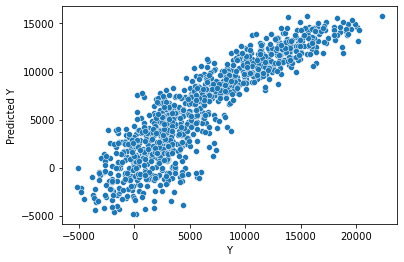

In [7]:
import seaborn as sns
sns.scatterplot(data=df3A, y="Predicted Y",x="Y")


Investigate linearity of preditor/response relationships

1i)  Now, create one scatterplot for each numeric predictor (not including dummy variables) against the response variables:

[Text(0.5, 1.0, 'X1 against Response variable')]

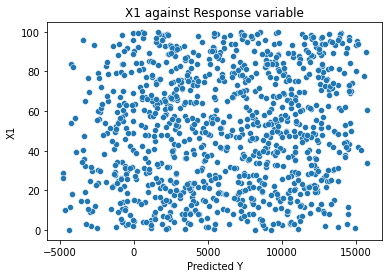

In [8]:
sns.scatterplot(data=df3A, x="Predicted Y",y="X1").set(title='X1 against Response variable')

[Text(0.5, 1.0, 'X2 against Response variable')]

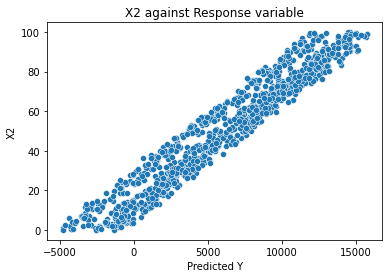

In [9]:
sns.scatterplot(data=df3A, x="Predicted Y",y="X2").set(title='X2 against Response variable')

[Text(0.5, 1.0, 'X3 against Response variable')]

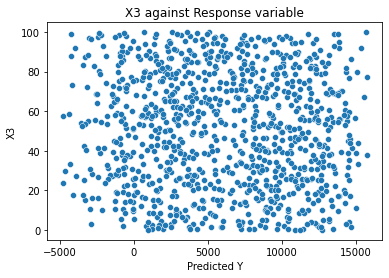

In [10]:
sns.scatterplot(data=df3A, x="Predicted Y",y="X3").set(title='X3 against Response variable')

[Text(0.5, 1.0, 'X4 against Response variable')]

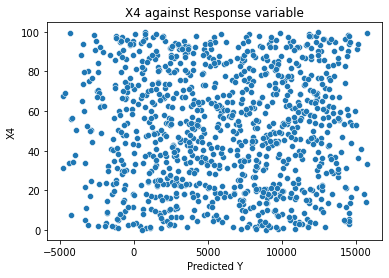

In [11]:
sns.scatterplot(data=df3A, x="Predicted Y",y="X4").set(title='X4 against Response variable')

[Text(0.5, 1.0, 'X5 against Response variable')]

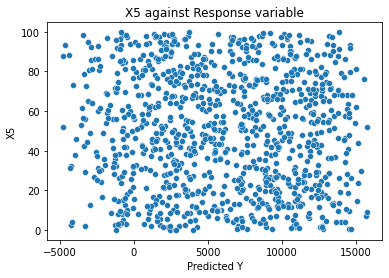

In [12]:
sns.scatterplot(data=df3A, x="Predicted Y",y="X5").set(title='X5 against Response variable')

1j)  Which predictor or predictors appear to have a nonlinear relationship with the response variable?

Ans) X1,X3,X4,X5 appear to have a non linear relationship with the respose variable